# Distance Transform Op

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@7b00c550

This `Op` takes a binary image (that is either two- or three-dimensional) as input and computes a [distance transform](https://en.wikipedia.org/wiki/Distance_transform) on it, calculating for each "on" pixel the distance to the nearest "off" pixel. 

Let's see how it is called:

In [2]:
ij.op().help('distancetransform')

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DistanceTransform2D(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DistanceTransform2DCalibration(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] calibration)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DistanceTransform3D(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DistanceTransform3DCalibration(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] calibration)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DefaultDistanceTransform(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.image.distancetransform.DefaultDistanceTransformCali

Note the parameters here:

* `RandomAccessibleInterval out`: an **optional** preallocated output image
* `RandomAccessibleInterval in`: the input image data. This image **must** be of some `BinaryType`.
* `double[] calibration`: this parameter alters the way the `Op` processes different dimensions. The index of a value within `calibration` influences the weight that the algorithm gives to the pass that the algorithm makes (i.e. column pass coming before row pass, thus a larger value in the first index as compared to the second index will cause the y-axis to have more weight in the transform than the x-axis). We will leave this array out of the tutorial, since it simplifies things.

Let's say that we want to make a topological map of the blobs image:

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


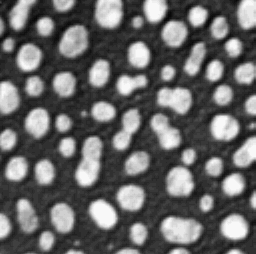

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

ij.notebook().display(inverted)

The first thing that we have to do is [binarize](../threshold/threshold.ipynb) the image:

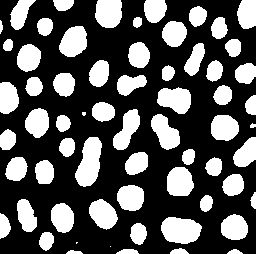

In [4]:
binaryInput = ij.op().run("threshold.huang", inverted)

ij.notebook().display(binaryInput)

Now that we have an binary input image with the blobs "on", let's run the simplest form of the distance transform:

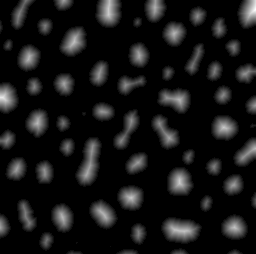

In [5]:
import net.imglib2.type.numeric.integer.IntType

output = ij.op().run("distancetransform", binaryInput)

ij.notebook().display(output)

Now we can see that the brightest portions of the output are the locations farthest from the image.